### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석
- InvoiceNo: 거래 번호
- StockCode: 상품 코드
- Description: 상품명 
- InvoiceDate: 거래 날짜
- UnitPrice: 상품 단가
- CustomerID: 고객 번호
- Country: 국가명

In [1]:
import pandas as pd
import numpy as np

co_df = pd.read_csv('./datasets/customer_invoice_data.csv')
co_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [2]:
co_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
co_df.duplicated().sum()

5268

In [4]:
co_df = co_df.drop_duplicates()
co_df.duplicated().sum() # 중복된 데이터 제거 

0

In [5]:
co_df.columns = ['invoice', 'code', 'description', 'quantity','date' ,'price', 'id','country']
co_df

,invoice,code,description,quantity,date,price,id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#### 실제 회사에서 가격을 맞추려고 id 값이 null 일 수 가 없기에 날리자

In [6]:
co_df = co_df.drop(index=co_df[co_df['id'].isna()].index, axis=1)
co_df.isna().sum()
co_df['id'].astype(int)
co_df

,invoice,code,description,quantity,date,price,id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
co_df = co_df.reset_index()
co_df

,index,invoice,code,description,quantity,date,price,id,country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
401599,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
401600,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
401601,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
401602,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
# ID 열에서 결측치를 찾아서 결측치 개수 계산
null_id_count = co_df['id'].isnull().sum()


# 결과 출력
print("결측치 개수:", null_id_count)


결측치 개수: 0


In [9]:
# description 컬럼을 제거 
co_df.drop(columns=['description'], inplace=True)
co_df

,index,invoice,code,quantity,date,price,id,country
0,0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
401600,541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
401601,541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
401602,541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
co_df['id'].value_counts()
co_df['id'].count()


401604

In [11]:

co_df['id'].value_counts()

id
17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: count, Length: 4372, dtype: int64

In [12]:
# 결측치 검사 결과description, id에 각각 1454, 135080이 나왔다. 
co_df.isnull().sum()
co_df[["id"]].describe().T

,count,mean,std,min,25%,50%,75%,max
id,401604.0,15281.160818,1714.006089,12346.0,13939.0,15145.0,16784.0,18287.0


In [13]:
co_df.value_counts()

index   invoice  code    quantity  date             price  id       country       
0       536365   85123A  6         12/1/2010 8:26   2.55   17850.0  United Kingdom    1
367990  568917   22383   10        9/29/2011 14:11  1.65   15955.0  United Kingdom    1
367988  568917   20726   10        9/29/2011 14:11  1.65   15955.0  United Kingdom    1
367987  568917   20723   10        9/29/2011 14:11  0.85   15955.0  United Kingdom    1
367986  568917   20725   10        9/29/2011 14:11  1.65   15955.0  United Kingdom    1
                                                                                     ..
191921  553388   21673   3         5/16/2011 16:36  1.25   15910.0  United Kingdom    1
191920  553388   22773   3         5/16/2011 16:36  1.25   15910.0  United Kingdom    1
191919  553388   22564   1         5/16/2011 16:36  1.25   15910.0  United Kingdom    1
191918  553388   23084   2         5/16/2011 16:36  2.08   15910.0  United Kingdom    1
541908  581587   22138   3         12

In [14]:
import numpy as np

Q1 = co_df.describe().T.loc['price', '25%']
Q3 = co_df.describe().T.loc['price', '75%']

iqr = Q3 - Q1

lower_bound = Q1 - iqr * 1.5
uppper_bound = Q3 + iqr * 1.5

if lower_bound < 0:
    lower_bound = 0

print(f'정상치 범위: {lower_bound} ~ {uppper_bound}')

정상치 범위: 0 ~ 7.5


In [15]:
# co_df['date'] = pd.to_datetime(co_df['date'])
# co_df.sort_values(['date'], ascending=False)
# aggregate 함수 (한번에 집계 처리 가능함 )


In [16]:
co_df = co_df[co_df['quantity'] > 0]
co_df


,index,invoice,code,quantity,date,price,id,country
0,0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,541904,581587,22613,12,12/9/2011 12:50,0.85,12680.0,France
401600,541905,581587,22899,6,12/9/2011 12:50,2.10,12680.0,France
401601,541906,581587,23254,4,12/9/2011 12:50,4.15,12680.0,France
401602,541907,581587,23255,4,12/9/2011 12:50,4.15,12680.0,France


In [17]:
# co_df = co_df[co_df['price'] > 0]

In [18]:
co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')
co_df

C:\Users\user\AppData\Local\Temp\ipykernel_19524\2650994710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['date'] = pd.to_datetime(co_df['date']).dt.strftime('%Y/%m/%d')


,index,invoice,code,quantity,date,price,id,country
0,0,536365,85123A,6,2010/12/01,2.55,17850.0,United Kingdom
1,1,536365,71053,6,2010/12/01,3.39,17850.0,United Kingdom
2,2,536365,84406B,8,2010/12/01,2.75,17850.0,United Kingdom
3,3,536365,84029G,6,2010/12/01,3.39,17850.0,United Kingdom
4,4,536365,84029E,6,2010/12/01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,541904,581587,22613,12,2011/12/09,0.85,12680.0,France
401600,541905,581587,22899,6,2011/12/09,2.10,12680.0,France
401601,541906,581587,23254,4,2011/12/09,4.15,12680.0,France
401602,541907,581587,23255,4,2011/12/09,4.15,12680.0,France


In [19]:
invoice_df = co_df.groupby('invoice')['id'].value_counts().reset_index()
code_df = co_df.groupby('id')['code'].value_counts().reset_index()
display(invoice_df)
display(code_df)
# 거래 번호 별 id 집계
# 상품 코드 별 id 집계

,invoice,id,count
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1
...,...,...,...
18531,581583,13777.0,2
18532,581584,13777.0,2
18533,581585,15804.0,21
18534,581586,13113.0,4


,id,code,count
0,12346.0,23166,1
1,12347.0,22375,6
2,12347.0,84558A,5
3,12347.0,21731,5
4,12347.0,22727,5
...,...,...,...
266797,18287.0,22758,1
266798,18287.0,22754,1
266799,18287.0,22752,1
266800,18287.0,22753,1


In [20]:
# 'date' 열을 복사하여 새로운 데이터프레임에 할당
co_df_copy = co_df.copy()

# 'date' 열의 값을 일 수로 변환하여 새로운 열에 저장
co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


C:\Users\user\AppData\Local\Temp\ipykernel_19524\2574841087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_df['date'] = (pd.to_datetime('2011-12-09') - pd.to_datetime(co_df_copy['date'])).dt.days


In [21]:

# 오름차순 정렬 예시
# df_sorted_asc = df.sort_values(by='column_name', ascending=True)

# # 내림차순 정렬 예시
# df_sorted_desc = df.sort_values(by='column_name', ascending=False)

In [22]:
# co_df['date'] = pd.to_datetime(co_df['date']).apply(lambda x: (pd.to_datetime('2011-12-09') - x).days)

In [23]:
co_df[co_df['price'] < 0]


# 데이트 값 구함 

,index,invoice,code,quantity,date,price,id,country


In [24]:


# # # Recency 구하기 
rfm_r = co_df.groupby('id')['date'].min().reset_index()
rfm_r.columns = ['id', 'Recency']
# 데이트 형식 변경 


#Frequency 구하기 
# rfm_f = co_df.groupby('id')['code'].value_counts().reset_index()
rfm_f = co_df['id'].value_counts().reset_index()
rfm_f.columns = ['id', 'Frequency']

# # Monetary 구하기 
rfm_m = co_df.groupby('id')['price'].sum().reset_index()
rfm_m.columns = ['id', 'Monetary']
rfm_m




rfm = pd.merge(rfm_r, rfm_m, on='id')
rfm = pd.merge(rfm, rfm_f, on='id')
rfm

,id,Recency,Monetary,Frequency
0,12346.0,325,1.04,1
1,12347.0,2,481.21,182
2,12348.0,75,178.71,31
3,12349.0,18,605.10,73
4,12350.0,310,65.30,17
...,...,...,...,...
4334,18280.0,277,47.65,10
4335,18281.0,180,39.36,7
4336,18282.0,7,62.39,12
4337,18283.0,3,1174.33,721


In [25]:
# co_df = co_df.drop(columns=['code'], axis=1)
co_df

,index,invoice,code,quantity,date,price,id,country
0,0,536365,85123A,6,373,2.55,17850.0,United Kingdom
1,1,536365,71053,6,373,3.39,17850.0,United Kingdom
2,2,536365,84406B,8,373,2.75,17850.0,United Kingdom
3,3,536365,84029G,6,373,3.39,17850.0,United Kingdom
4,4,536365,84029E,6,373,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,541904,581587,22613,12,0,0.85,12680.0,France
401600,541905,581587,22899,6,0,2.10,12680.0,France
401601,541906,581587,23254,4,0,4.15,12680.0,France
401602,541907,581587,23255,4,0,4.15,12680.0,France


In [26]:
# 정규화 진행 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm[['Recency', 'Frequency', 'Monetary']] = \
                                    scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [27]:
# 최근일 수록 숫자가 더 작게 나오기 때문에, 1을 빼준 값으로 점수를 계산한다.
rfm['Recency'] = 1 - rfm['Recency']
rfm

,id,Recency,Monetary,Frequency
0,12346.0,0.128686,0.000031,0.000000
1,12347.0,0.994638,0.014437,0.023583
2,12348.0,0.798928,0.005361,0.003909
3,12349.0,0.951743,0.018153,0.009381
4,12350.0,0.168901,0.001959,0.002085
...,...,...,...,...
4334,18280.0,0.257373,0.001430,0.001173
4335,18281.0,0.517426,0.001181,0.000782
4336,18282.0,0.981233,0.001872,0.001433
4337,18283.0,0.991957,0.035231,0.093811


In [28]:
# rfm.groupby('id').agg(Recency = {'Recency','min'), Frequency=('count','count')})
# rfm = rfm.copy()
# rfm.loc[:,'Monetary'] = co_df['price'] * co_df['quantity']
# Monetary 다시 구하기

# rfm

# co_df = rfm.groupby('id')['Monetary'].sum()

# rfm = rfm.iloc[rfm['Monetary'] > 0].index] = 0


,id,Recency,Monetary,Frequency,TotalScore


In [29]:
# RFM 점수 계산
rfm['TotalScore'] = rfm[['Recency', 'Frequency', 'Monetary']].sum(axis=1)
rfm

,id,Recency,Monetary,Frequency,TotalScore
0,12346.0,0.128686,0.000031,0.000000,0.128718
1,12347.0,0.994638,0.014437,0.023583,1.032658
2,12348.0,0.798928,0.005361,0.003909,0.808198
3,12349.0,0.951743,0.018153,0.009381,0.979277
4,12350.0,0.168901,0.001959,0.002085,0.172945
...,...,...,...,...,...
4334,18280.0,0.257373,0.001430,0.001173,0.259975
4335,18281.0,0.517426,0.001181,0.000782,0.519389
4336,18282.0,0.981233,0.001872,0.001433,0.984538
4337,18283.0,0.991957,0.035231,0.093811,1.120999


In [30]:
co_df.isnull().sum()

index       0
invoice     0
code        0
quantity    0
date        0
price       0
id          0
country     0
dtype: int64

In [31]:
co_rfm_df = pd.merge(co_df, rfm, on='id')
co_rfm_df

,index,invoice,code,quantity,date,price,id,country,Recency,Monetary,Frequency,TotalScore
0,0,536365,85123A,6,373,2.55,17850.0,United Kingdom,0.002681,0.035288,0.038567,0.076536
1,1,536365,71053,6,373,3.39,17850.0,United Kingdom,0.002681,0.035288,0.038567,0.076536
2,2,536365,84406B,8,373,2.75,17850.0,United Kingdom,0.002681,0.035288,0.038567,0.076536
3,3,536365,84029G,6,373,3.39,17850.0,United Kingdom,0.002681,0.035288,0.038567,0.076536
4,4,536365,84029E,6,373,3.39,17850.0,United Kingdom,0.002681,0.035288,0.038567,0.076536
...,...,...,...,...,...,...,...,...,...,...,...,...
392727,541801,581578,22993,12,0,1.25,12713.0,Germany,1.000000,0.002854,0.004821,1.007675
392728,541802,581578,22907,12,0,0.85,12713.0,Germany,1.000000,0.002854,0.004821,1.007675
392729,541803,581578,22908,12,0,0.85,12713.0,Germany,1.000000,0.002854,0.004821,1.007675
392730,541804,581578,23215,12,0,2.08,12713.0,Germany,1.000000,0.002854,0.004821,1.007675


In [32]:
real_df = co_rfm_df.groupby('id')[['invoice','code','quantity','date','price','country','TotalScore']].first().reset_index()
display(real_df)

,id,invoice,code,quantity,date,price,country,TotalScore
0,12346.0,541431,23166,74215,325,1.04,United Kingdom,0.128718
1,12347.0,537626,85116,12,367,2.10,Iceland,1.032658
2,12348.0,539318,84992,72,358,0.55,Finland,0.808198
3,12349.0,577609,23112,2,18,7.50,Italy,0.979277
4,12350.0,543037,21908,12,310,2.10,Norway,0.172945
...,...,...,...,...,...,...,...,...
4334,18280.0,545712,82484,3,277,7.90,United Kingdom,0.259975
4335,18281.0,556464,22037,12,180,0.42,United Kingdom,0.519389
4336,18282.0,562525,21270,1,126,12.75,United Kingdom,0.984538
4337,18283.0,540350,22356,1,337,0.85,United Kingdom,1.120999


In [33]:
# 중복된 ID 값을 하나로 합쳐서 평균을 계산
co_rfm_df_combined = co_rfm_df.groupby('id')[['TotalScore','Recency']].mean().reset_index()
# 나라별로 데이터를 그룹화하고 회원 ID 추출
co_country_id_df = co_rfm_df.groupby('country')['id'].unique().value_counts().reset_index()

# 결과 확인
print(co_country_id_df)

# 결과 확인
print(co_rfm_df_combined)
co_rfm_df_combined
# co_country_id_df

                                                   id  count
0   [12431.0, 12386.0, 12415.0, 12393.0, 12388.0, ...      1
1   [12763.0, 12755.0, 12753.0, 12754.0, 12770.0, ...      1
2                                           [15332.0]      1
3                                  [17828.0, 15480.0]      1
4   [12791.0, 14646.0, 12778.0, 12775.0, 12759.0, ...      1
5   [12433.0, 12350.0, 12352.0, 12432.0, 12444.0, ...      1
6   [12779.0, 12576.0, 12815.0, 12816.0, 12750.0, ...      1
7   [12793.0, 12808.0, 12766.0, 12797.0, 12785.0, ...      1
8                                           [12446.0]      1
9                                           [12565.0]      1
10                                          [12744.0]      1
11  [12557.0, 17097.0, 12540.0, 12551.0, 12417.0, ...      1
12  [17404.0, 12483.0, 12676.0, 12639.0, 12697.0, ...      1
13  [13520.0, 12377.0, 12451.0, 12422.0, 12410.0, ...      1
14               [12733.0, 12607.0, 12646.0, 12558.0]      1
15                      

,id,TotalScore,Recency
0,12346.0,0.128718,0.128686
1,12347.0,1.032658,0.994638
2,12348.0,0.808198,0.798928
3,12349.0,0.979277,0.951743
4,12350.0,0.172945,0.168901
...,...,...,...
4334,18280.0,0.259975,0.257373
4335,18281.0,0.519389,0.517426
4336,18282.0,0.984538,0.981233
4337,18283.0,1.120999,0.991957


In [34]:
co_df['country'].value_counts()


country
United Kingdom          349227
Germany                   9027
France                    8327
EIRE                      7228
Spain                     2480
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1453
Australia                 1184
Norway                    1072
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [35]:
co_rfm_df_combined # id를 그룹별로 묶어서 TotalScore를 추출 

,id,TotalScore,Recency
0,12346.0,0.128718,0.128686
1,12347.0,1.032658,0.994638
2,12348.0,0.808198,0.798928
3,12349.0,0.979277,0.951743
4,12350.0,0.172945,0.168901
...,...,...,...
4334,18280.0,0.259975,0.257373
4335,18281.0,0.519389,0.517426
4336,18282.0,0.984538,0.981233
4337,18283.0,1.120999,0.991957


In [36]:
import numpy as np

l1, l2, l3 = np.percentile(real_df['TotalScore'], [25, 70, 90])
print(l1, l2, l3)

0.6331334766082717 0.9600543780261492 1.014439770645399


In [37]:
def get_level(x):
    if x <= l1:
        return 4
    if x <= l2:
        return 3
    if x <= l3:
        return 2
    return 1

In [38]:
real_df['Level'] = real_df['TotalScore'].apply(get_level)
real_df

,id,invoice,code,quantity,date,price,country,TotalScore,Level
0,12346.0,541431,23166,74215,325,1.04,United Kingdom,0.128718,4
1,12347.0,537626,85116,12,367,2.10,Iceland,1.032658,1
2,12348.0,539318,84992,72,358,0.55,Finland,0.808198,3
3,12349.0,577609,23112,2,18,7.50,Italy,0.979277,2
4,12350.0,543037,21908,12,310,2.10,Norway,0.172945,4
...,...,...,...,...,...,...,...,...,...
4334,18280.0,545712,82484,3,277,7.90,United Kingdom,0.259975,4
4335,18281.0,556464,22037,12,180,0.42,United Kingdom,0.519389,4
4336,18282.0,562525,21270,1,126,12.75,United Kingdom,0.984538,2
4337,18283.0,540350,22356,1,337,0.85,United Kingdom,1.120999,1


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

real_df['Level'] = real_df['Level'].replace([4,3,2,1], ['Bronze', 'Silver','Diamond','VIP'])
real_df


,id,invoice,code,quantity,date,price,country,TotalScore,Level
0,12346.0,541431,23166,74215,325,1.04,United Kingdom,0.128718,Bronze
1,12347.0,537626,85116,12,367,2.10,Iceland,1.032658,VIP
2,12348.0,539318,84992,72,358,0.55,Finland,0.808198,Silver
3,12349.0,577609,23112,2,18,7.50,Italy,0.979277,Diamond
4,12350.0,543037,21908,12,310,2.10,Norway,0.172945,Bronze
...,...,...,...,...,...,...,...,...,...
4334,18280.0,545712,82484,3,277,7.90,United Kingdom,0.259975,Bronze
4335,18281.0,556464,22037,12,180,0.42,United Kingdom,0.519389,Bronze
4336,18282.0,562525,21270,1,126,12.75,United Kingdom,0.984538,Diamond
4337,18283.0,540350,22356,1,337,0.85,United Kingdom,1.120999,VIP


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ['Bronze', 'Silver','Diamond','VIP']

print(real_df['Level'].value_counts())

Level
Silver     1952
Bronze     1085
Diamond     868
VIP         434
Name: count, dtype: int64


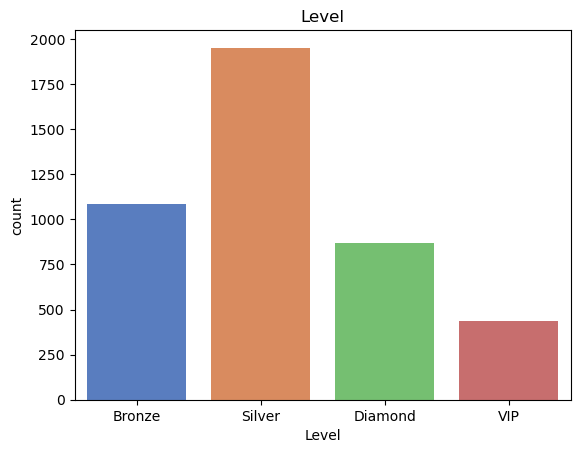

In [41]:
sns.countplot(x='Level', data=real_df, palette='muted', order=order)
plt.title('Level')
plt.show()

#### 멤버 등급 분석 보고서 
- 멤버 등급 중 실버 등급의 회원들이 가장 많은 것을 볼 수 있으며, 그 다음으로 브론즈, 다이아몬드, VIP 순으로 멤버 등급이 포진되어 있는 것을 알 수 있습니다.
- 소개:
이 보고서는 회원 등급에 대한 분석 결과를 제시하여 회원 등급의 현황을 파악하고 향후 전략 수립에 도움을 주고자 합니다.

1. 등급 분포:

실버 등급의 회원들이 전체 회원 중 가장 많은 비율을 차지하고 있습니다. 실버 회원은 전체 회원의 약 XX%를 차지하고 있습니다.
그 다음으로는 브론즈 회원이 뒤를 이어 실버 등급에 이어 두 번째로 많은 비율을 차지하고 있습니다. 브론즈 회원은 전체 회원의 약 XX%를 차지하고 있습니다.
다이아몬드 회원과 VIP 회원은 상대적으로 적은 수의 회원을 보유하고 있지만, 회원 당 매출이 높은 특성을 갖고 있습니다.
2. 등급별 특성:

실버 회원: 대다수의 회원이 실버 등급에 속하며, 이들은 일정 수준의 구매력을 가지고 있습니다. 이들을 대상으로 한 프로모션 및 할인 이벤트가 효과적일 것으로 보입니다.
브론즈 회원: 대부분의 실버 회원이 브론즈 등급으로 이동하는 단계로, 이들의 이탈을 방지하고 장기적인 고객 유지를 위해 적합한 리텐션 전략이 필요합니다.
다이아몬드 및 VIP 회원: 소수의 고객이지만 매우 높은 구매력을 갖고 있습니다. 이들에게는 프리미엄 서비스 및 맞춤형 혜택을 제공하여 고객 만족도를 높이고 로열티를 유지해야 합니다.
3. 향후 전략:

실버 및 브론즈 회원 유입 강화: 실버 및 브론즈 회원을 유입시키는데 초점을 맞춘 마케팅 캠페인을 개발하여 신규 고객을 확보합니다.
다이아몬드 및 VIP 회원 유지 및 확장: 다이아몬드 및 VIP 회원의 로열티를 유지하고 증대하기 위해 특별한 혜택 및 서비스를 제공합니다

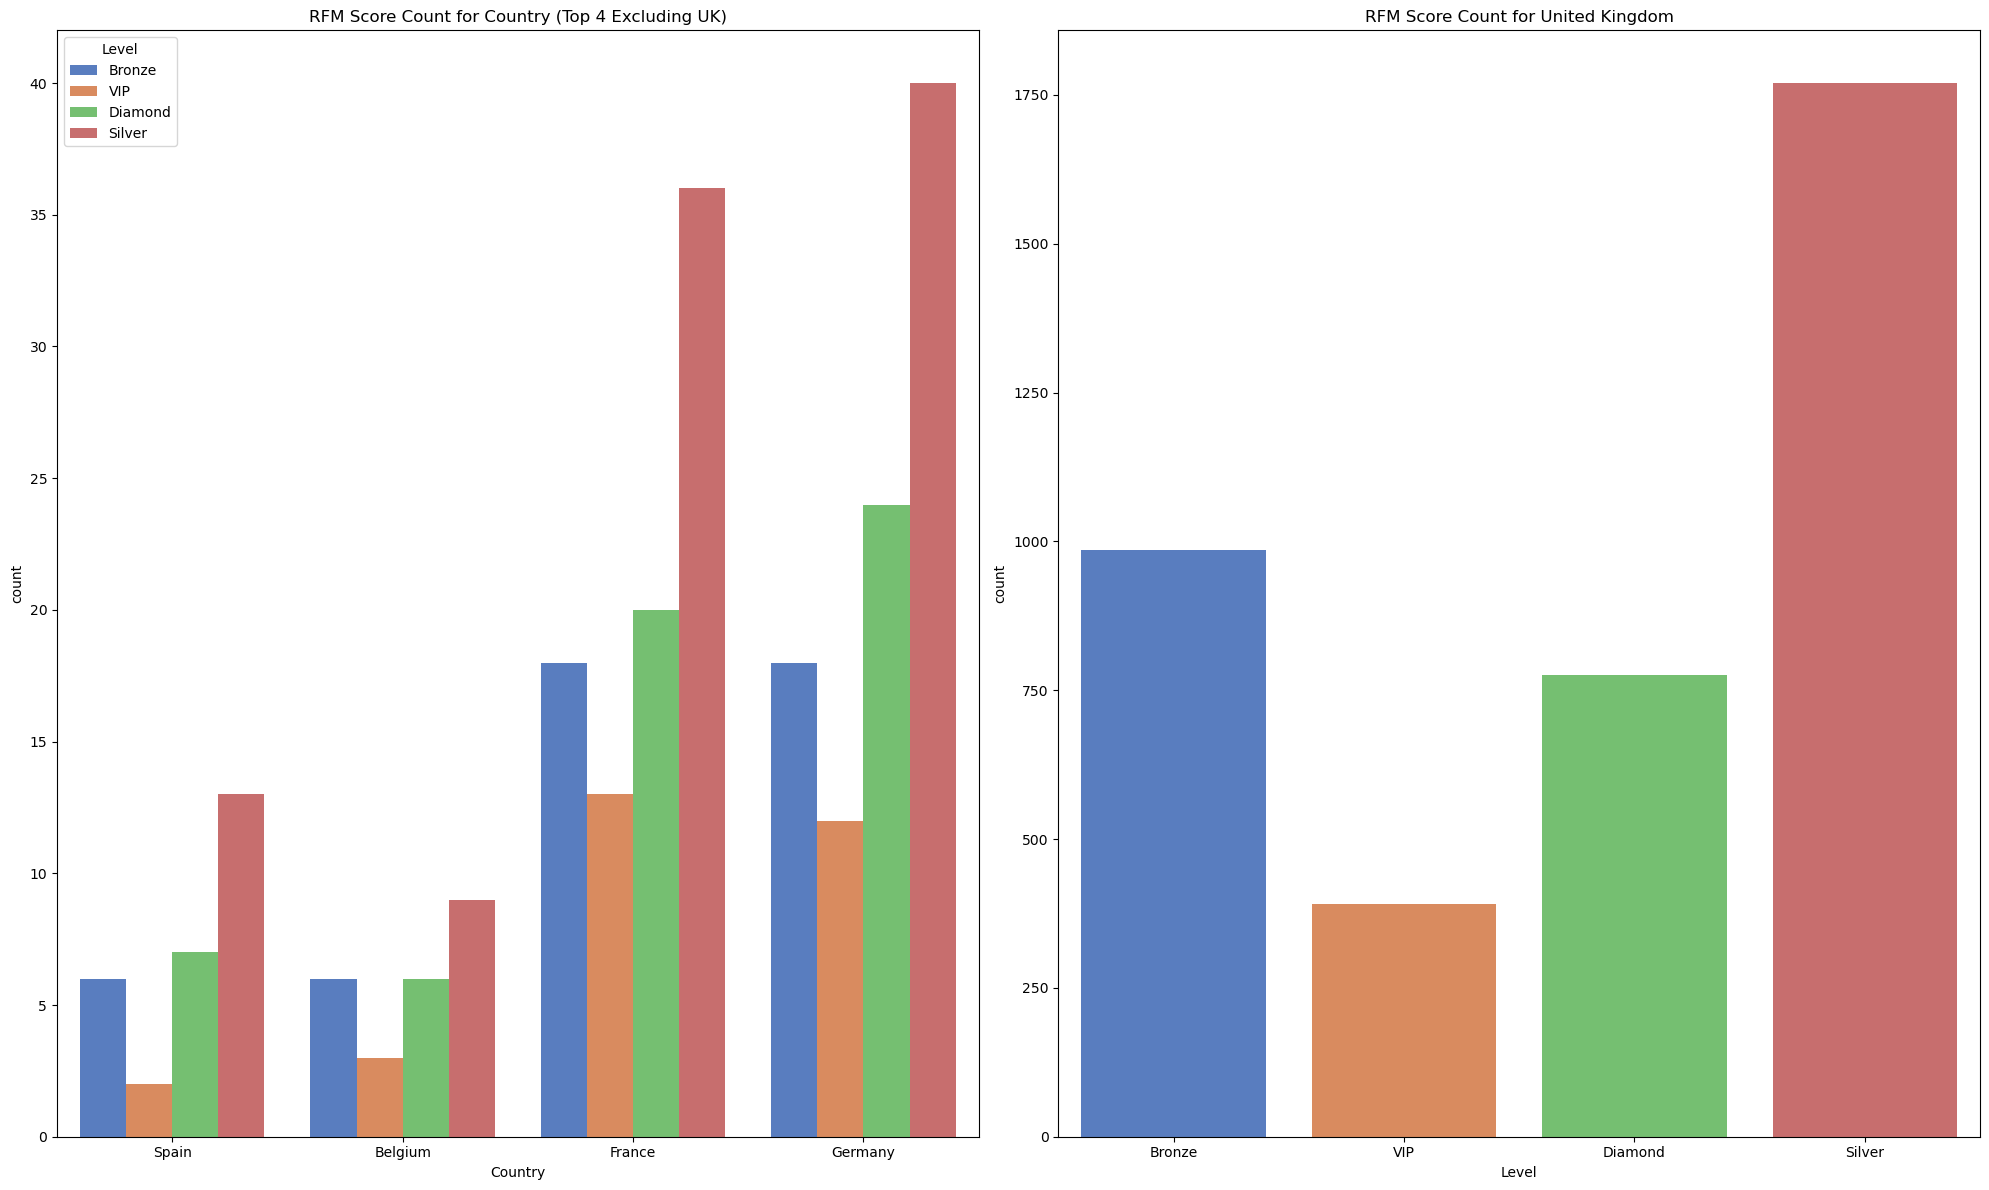

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# "United Kingdom"을 제외한 상위 4개 국가 선택
top_countries = real_df[real_df['country'] != 'United Kingdom']['country'].value_counts().nlargest(4).index

# 상위 4개 국가에 해당하는 데이터 필터링
filtered_df = real_df[real_df['country'].isin(top_countries)]

# 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# 왼쪽 그래프: 전체 국가에 대한 RFM Score count
sns.countplot(ax=axes[0], x='country', hue='Level', data=filtered_df, palette='muted')
axes[0].set_title('RFM Score Count for Country (Top 4 Excluding UK)')
axes[0].set_xlabel('Country')

# 오른쪽 그래프: 영국(United Kingdom)에 대한 RFM Score count
uk_df = real_df[real_df['country'] == 'United Kingdom']
sns.countplot(ax=axes[1], x='Level', data=uk_df, palette='muted')
axes[1].set_title('RFM Score Count for United Kingdom')
axes[1].set_xlabel('Level')

plt.tight_layout()
plt.show()



#### 국가별 마케팅 보고서 
- 영국을 제외한 나머지 상위 4개 국가들의 멤버 등급을 추출한 결과 모든 국가에서 실버 등급의 멤버가 가장 높은 것을 볼 수 있습니다.
- 지역 타겟 마켓팅
  프랑스와 독일에 VIP 등급이 많은 것으로 보아 해당 지역에서의 프로모션 및 이벤트를 통해 고객들의 만족도를 높일 필요가 있습니다.

- 등급별 마케팅  
고객들을 모두 고려하여 제품과 지역에 따른 다양한 프로모션 및 할인 이벤트를 제공해야 합니다. 이러한 마케팅 전략을 통해 제품 선호도와 지역 선호도를 고려한 타겟 마케팅을 실시하고, 각 등급의 고객들을 모두 고려한 다채로운 마케팅 활동을 펼쳐 고객들의 만족도를 높이고 매출을 증대시킬 수 있을 것으로 기대됩니다.

In [44]:
import pandas as pd

# 샘플 데이터프레임 생성
df = pd.DataFrame({
    'A': [1, 3, 2],
    'B': [4, 6, 5],
    'C': [7, 9, 8]
})

# axis=0 (행 방향)으로 정렬
df_sorted_axis0 = df.sort_values(by='A', axis=0)
print("행 방향으로 정렬:")
print(df_sorted_axis0)

# axis=1 (열 방향)으로 정렬
df_sorted_axis1 = df.sort_values(by=0, axis=1)
print("\n열 방향으로 정렬:")
print(df_sorted_axis1)


행 방향으로 정렬:
   A  B  C
0  1  4  7
2  2  5  8
1  3  6  9

열 방향으로 정렬:
   A  B  C
0  1  4  7
1  3  6  9
2  2  5  8
